In [33]:
import csv
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from io import open
import nltk 
import sys
from sklearn import model_selection, metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
label=[]
predict=[]
with open('test_511.tsv',encoding='utf-8', errors='ignore') as csvfile:
    for line in csvfile:
        line = line.split(",Article:")[0]
        label.append(line)
with open('test_results_511.tsv','r') as csvfile:
    reader = csv.reader(csvfile)
    predict = [row[0] for row in reader]


In [34]:
def data_process(label,predict):
    nc1=[]
    for item in label:
        if len(item)==1:
            nc1.append(float(item))
    nc2=[]
    for item in predict:
        for x in range(0,len(item)):
            if item[x]=='\t':
                nc2.append(float(item[x+1:])) 
    predict_label=[]
    for item in nc2:
        if item>=0.5:
            predict_label.append(1)
        else: predict_label.append(0)
    return nc1,nc2,predict_label
label,predict,predict_label=data_process(c1,c2)    

In [35]:
def plot_confusion(cm, title='Confusion matrix', cmap=plt.cm.Reds, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plt.savefig("bert_out.jpg")

Accuracy Score: 0.884710

              precision    recall  f1-score   support

 unimportant   0.962573  0.883047  0.921097       932
   important   0.703804  0.890034  0.786039       291

   micro avg   0.884710  0.884710  0.884710      1223
   macro avg   0.833189  0.886541  0.853568      1223
weighted avg   0.901002  0.884710  0.888961      1223



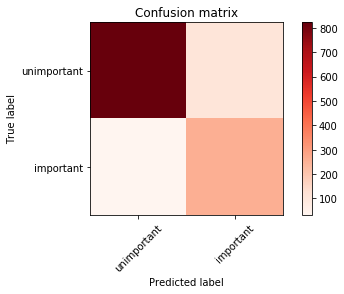

<Figure size 432x288 with 0 Axes>

In [36]:
print ("Accuracy Score: %f\n" % metrics.accuracy_score(predict_label,nc1))
labels = ['unimportant', 'important']
print(classification_report(predict_label, label,target_names=labels, digits=6))
image = confusion_matrix(predict_label, label)
plot_confusion(image,labels=labels)

Text(0.5, 0.98, 'AUC is 0.9280129672006102 .')

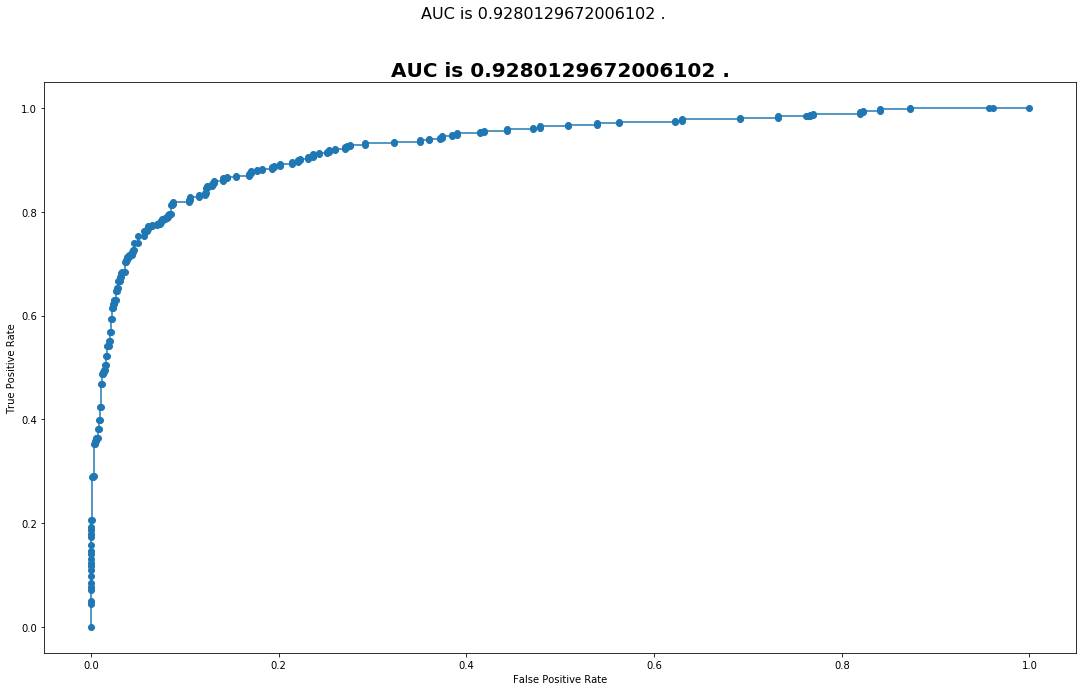

In [38]:
predict_label = np.array(predict_label)
pre=np.array(label)
scores = np.array(predict)
fpr, tpr, thresholds = metrics.roc_curve(lab, scores,pos_label=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show
from sklearn.metrics import auc
AUC = auc(fpr, tpr)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
s = 'AUC is {n} .'
plt.plot(fpr,tpr,marker = 'o')
plt.title(s.format(n=AUC),fontsize=20,fontweight='bold')
plt.savefig("fasttext.jpg")
plt.suptitle(s.format(n=AUC), fontsize=16)